### 라이브러리 선언

In [1030]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [1031]:
# x, y축을 그리는 함수
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [1032]:
# 주어진 4개의 점을 이용하여 직사각형을 그리는 함수
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [1033]:
# 물체를 그리는 함수 
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)

In [1034]:
# def draw_object(ax):
#     angle = 45 # 회전 각도
#     theta = np.deg2rad(angle)
#     c, s = np.cos(theta), np.sin(theta)
#     R = np.array(((c, -s), (s, c))) # 회전 행렬

#     LEN = 400 # 사각형 크기
#     p1 = np.array([-LEN/2, -LEN/2])
#     p2 = np.array([LEN/2, -LEN/2])
#     p3 = np.array([LEN/2, LEN/2])
#     p4 = np.array([-LEN/2, LEN/2])

#     # 회전 적용
#     p1, p2, p3, p4 = np.matmul(R, p1), np.matmul(R, p2), np.matmul(R, p3), np.matmul(R, p4)

#     draw_rectangle(ax, p1, p2, p3, p4)


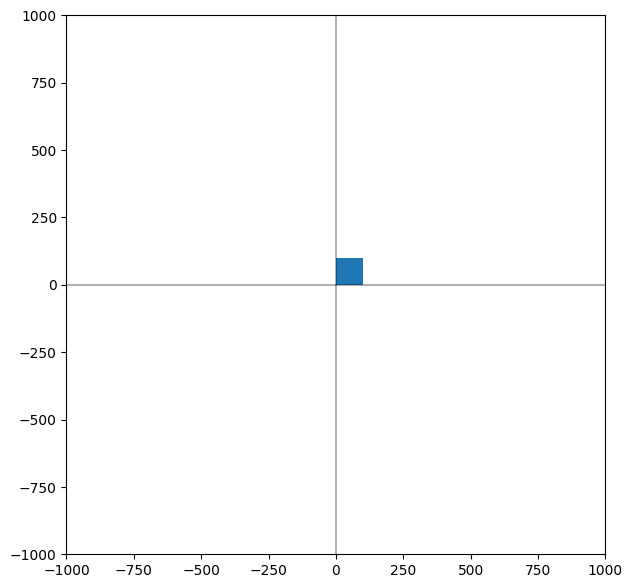

In [1035]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

In [1036]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [1037]:
def scale(point, sx, sy):
  """
  point를 (sx, sy)만큼 확대/축소하여 반환
  """
  S = np.array([[sx, 0], [0, sy]])  # 확대/축소 행렬
  return np.matmul(S, point)

def rotate(p, theta):
    """주어진 점 p를 theta 각도만큼 시계 방향으로 회전시킨 새로운 점을 반환합니다."""
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return np.matmul(R, p)

def shear(p, s):
    # s[0]: x축으로 기울기, s[1]: y축으로 기울기
    x, y = p
    return np.array([x + s[0] * y, y + s[1] * x])



In [1038]:
def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)
  

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [1039]:
# x축 대칭 함수
def reflect_x(p):
  return np.array([-p[0], p[1]])

# 오른쪽 날개 연결 
def draw_right_arm(ax, r1, r2, r3, r4):  
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  rr1 = translate(r1, -LEN/2, -LEN/2)
  rr2 = translate(r2, -LEN/2, -LEN/2)
  rr3 = translate(r3, -LEN/2, -LEN/2)
  rr4 = translate(r4, -LEN/2, -LEN/2)

  # 2. 크기 변환: S(2, 0.5)
  s = (2, 6)
  rr1 = scale(rr1, *s)
  rr2 = scale(rr2, *s)
  rr3 = scale(rr3, *s)
  rr4 = scale(rr4, *s)
  
  # 3. 회전 변환: R(pi/4)
  range = 2.5
  rr1 = rotate(rr1, 3.14/range)
  rr2 = rotate(rr2, 3.14/range)
  rr3 = rotate(rr3, 3.14/range)
  rr4 = rotate(rr4, 3.14/range)
  
  # 4. 이동 변환: T(LEN/2, 0)
  x = 20
  y = 40
  rr1 = translate(rr1, x, y)
  rr2 = translate(rr2, x, y)
  rr3 = translate(rr3, x, y)
  rr4 = translate(rr4, x, y)

  # 5. polygon 그리기 
  draw_rectangle(ax, rr1, rr2, rr3, rr4)

  # 6. x축 대칭 변환: Rx
  rr1 = reflect_x(rr1)
  rr2 = reflect_x(rr2)
  rr3 = reflect_x(rr3)
  rr4 = reflect_x(rr4)

  # 7. polygon 그리기 
  draw_rectangle(ax, rr1, rr2, rr3, rr4)

  # 8. y축 대칭 변환: Ry
  rr1 = flip_y(rr1)
  rr2 = flip_y(rr2)
  rr3 = flip_y(rr3)
  rr4 = flip_y(rr4)

  # 9. polygon 그리기 
  draw_rectangle(ax, rr1, rr2, rr3, rr4)

  # 10. x축 대칭 변환: Rx (원래대로)
  rr1 = reflect_x(rr1)
  rr2 = reflect_x(rr2)
  rr3 = reflect_x(rr3)
  rr4 = reflect_x(rr4)

  # 11. polygon 그리기 
  draw_rectangle(ax, rr1, rr2, rr3, rr4)

In [1040]:
# y축 대칭 함수
def reflect_y(p):
    return np.array([-p[0], p[1]])

# 그냥 날개 
def draw_right_wing(ax, r1, r2, r3, r4):
    # 1. 사각형을 원점으로 이동 변환
    rr1 = translate(r1, -LEN/2, -LEN/2)
    rr2 = translate(r2, -LEN/2, -LEN/2)
    rr3 = translate(r3, -LEN/2, -LEN/2)
    rr4 = translate(r4, -LEN/2, -LEN/2)

    # 2. 크기 변환
    s = (2, 8)
    rr1 = scale(rr1, *s)
    rr2 = scale(rr2, *s)
    rr3 = scale(rr3, *s)
    rr4 = scale(rr4, *s)

    # 3. 회전 변환
    range = 1
    rr1 = rotate(rr1, 3.14/range)
    rr2 = rotate(rr2, 3.14/range)
    rr3 = rotate(rr3, 3.14/range)
    rr4 = rotate(rr4, 3.14/range)

    # 4. 기울기 변환: shear
    shear_rate = 0.5
    rr1 = shear(rr1, [0, shear_rate])
    rr2 = shear(rr2, [0, shear_rate])
    rr3 = shear(rr3, [0, shear_rate])
    rr4 = shear(rr4, [0, shear_rate])

    # 5. 이동 변환
    xx = 800
    yy = -300
    rr1 = translate(rr1, xx, yy)
    rr2 = translate(rr2, xx, yy)
    rr3 = translate(rr3, xx, yy)
    rr4 = translate(rr4, xx, yy)

    # 9. polygon 그리기 
    draw_rectangle(ax, rr1, rr2, rr3, rr4)


    # 6. y축 대칭 변환: Ry
    rr1 = reflect_y(rr1)
    rr2 = reflect_y(rr2)
    rr3 = reflect_y(rr3)
    rr4 = reflect_y(rr4)

    # 7. polygon 그리기
    draw_rectangle(ax, rr1, rr2, rr3, rr4)


In [1041]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  r1 = np.array([LEN, -LEN/2])
  r2 = np.array([LEN+LEN/2, -LEN/2])
  r3 = np.array([LEN+LEN/2, LEN/2])
  r4 = np.array([LEN, LEN/2])

  rr1 = np.array([LEN, -LEN/2])
  rr2 = np.array([LEN+LEN/2, -LEN/2])
  rr3 = np.array([LEN+LEN/2, LEN/2])
  rr4 = np.array([LEN, LEN/2])

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)
  draw_right_arm(ax, r1, r2, r3, r4)
  draw_right_wing(ax, rr1, rr2, rr3, rr4)

### 3. main

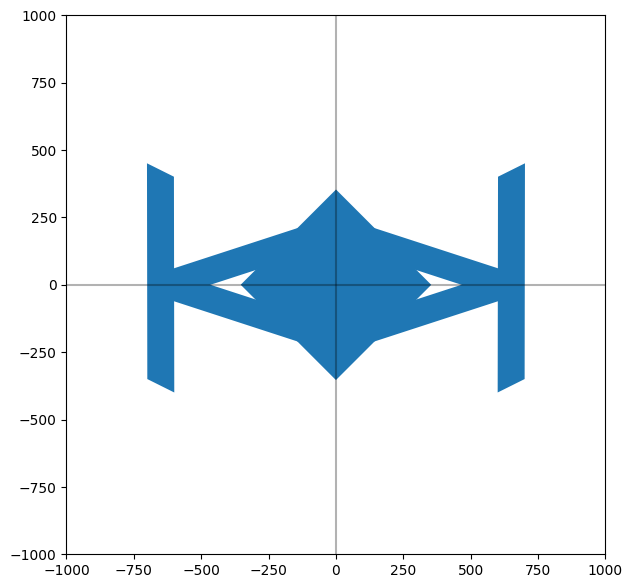

In [1042]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

In [1043]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1

def translate(p, dx, dy):

  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱 q = np.dot(m, hp) #print(q)
  q = np.dot(m, hp) # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])

  return q